d:\Users\jg255\anaconda3\envs\ray310\lib\site-packages\scipy\optimize\_trustregion_constr\projections.py:181: UserWarning: Singular Jacobian matrix. Using SVD decomposition to perform the factorizations.
  warn('Singular Jacobian matrix. Using SVD decomposition to ' +
d:\Users\jg255\anaconda3\envs\ray310\lib\site-packages\scipy\optimize\_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


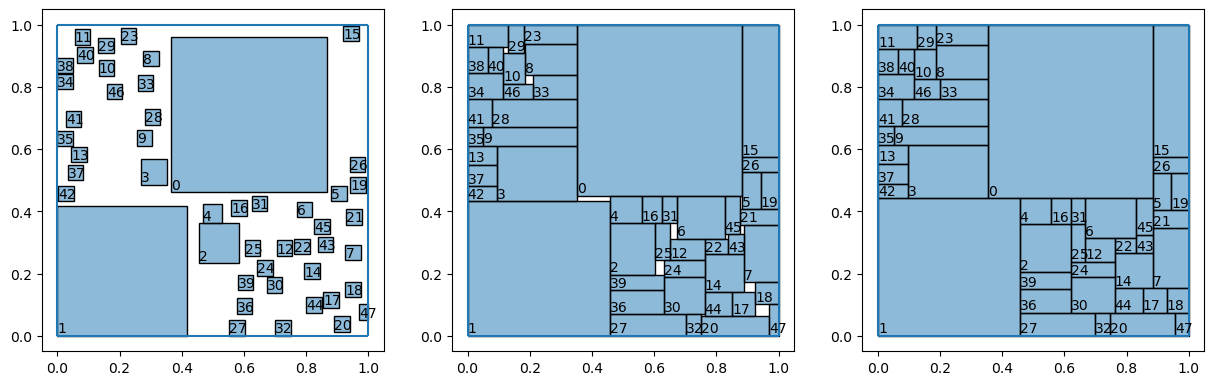

In [1]:
from SquareDivision.src.rectangle_class import Rectangulation

rects = Rectangulation(config={'seed' : 123456})
rects.execute(num=200)
rects.prepare_constraints()
rects.close_holes()
rects.draw_closed()

In [11]:
import numpy as np
np.max(rects.sol.x.reshape(-1,4)[:,2:])

0.5577145384794951

{0: {'pos': (0.3519472942139593, 0.45027263423296726)},
 1: {'pos': (0.0, 0.0)},
 2: {'pos': (0.45641023768415756, 0.1969038396903735)},
 3: {'pos': (0.0945265985445066, 0.43214450535858984)},
 4: {'pos': (0.45641023768415756, 0.3622355940994434)},
 5: {'pos': (0.881050936603124, 0.4070738404768898)},
 6: {'pos': (0.6750162031192612, 0.3123955103086174)},
 7: {'pos': (0.8878377653282862, 0.17318283862147443)},
 8: {'pos': (0.183466397928016, 0.837355911814765)},
 9: {'pos': (0.04999999999999996, 0.6111488034954757)},
 10: {'pos': (0.11388497435213062, 0.8105705282548805)},
 11: {'pos': (0.0, 0.9278872803757046)},
 12: {'pos': (0.6521700173893821, 0.24340689108341051)},
 13: {'pos': (0.0, 0.5507450585697046)},
 14: {'pos': (0.7626556055462089, 0.1402396018347033)},
 15: {'pos': (0.881050936603124, 0.5752292547419431)},
 16: {'pos': (0.5598425928244102, 0.3622355940994434)},
 17: {'pos': (0.8502794027219832, 0.061895325491011705)},
 18: {'pos': (0.9259626502226377, 0.10056364232372458)},

In [16]:
rects.clinched_rectangles.shape

(48, 5)

In [ ]:
# rects.sol.x.reshape(-1,4)[36]
# rects.clinched_rectangles[:,:4]
rects.sol.fun
# for constrain in rects.const_trust:
#     print(constrain.A.dot(rects.clinched_rectangles[:,:4].flatten()))
# rects.clinched_rectangles.shape
# import numpy as np

# np.maximum(0, rects.clinched_rectangles[8,:4])

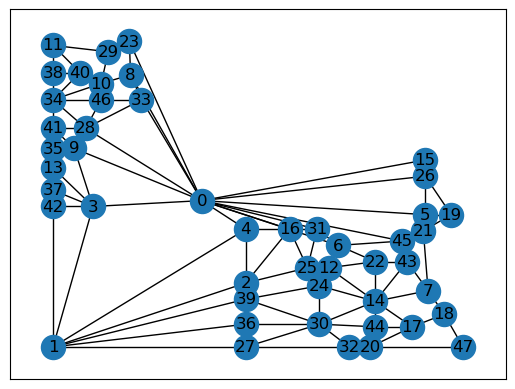

In [20]:
import networkx as nx
G = nx.from_numpy_array(rects.east_neighbours + rects.north_neighbours)
attrs = { i : {'pos': tuple(row[:2])} for i, row in enumerate(rects.clinched_rectangles)}
nx.set_node_attributes(G, attrs)
pos = nx.get_node_attributes(G,'pos')
nx.draw_networkx(G,pos=pos)

In [23]:
G.nodes['pos']

KeyError: 'pos'

In [3]:
import numpy as np
pts_diag = np.array(
                 [[0.25, 0.25],
                  [0.75, 0.75]])
def tepui(
        base:float=0.05,
        top:float=0.3,
        slope:float=4,
        vertex:float=1,
        pts:np.ndarray=pts_diag
):
    return lambda pt : np.minimum(top, np.maximum(base, vertex - slope * np.min(np.linalg.norm(pts - pt, axis=1))))

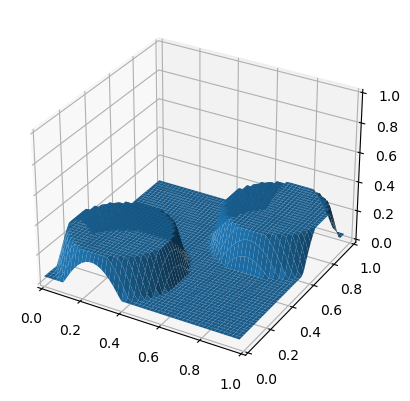

In [6]:
import matplotlib.pyplot as plt
from matplotlib.axes import Axes

tepui_at = tepui(
        base=0.05,
        top=0.3,
        slope=5,
        vertex=1.5,
)

x = np.arange(0, 1, 0.02)
y = np.arange(0, 1, 0.02)

X, Y = np.meshgrid(x, y)
points = np.array([X,Y])

nu = np.apply_along_axis(tepui_at, 0, points)

fig = plt.figure()
ax:Axes = fig.add_subplot(projection='3d')
ax.axes.set_xlim3d(left=0, right=1) 
ax.axes.set_ylim3d(bottom=0, top=1) 
ax.axes.set_zlim3d(bottom=0, top=1) 
ax.plot_surface(X, Y, nu)
plt.show()

In [8]:
from SquareDivision.src.generators import uniform_pts
random_points = uniform_pts(n=5)
vals = np.apply_along_axis(tepui_at, 1, random_points)
vals
# rng = np.random.default_rng(1234)
# rng.uniform([xmin, ymin], [xmax, ymax], size=(n, 2))

array([0.4       , 0.05      , 0.05      , 0.05      , 0.36100765])

In [24]:
import numpy as np
norma_a = np.array([[1, 1],[2, 3],[4, 5],[6, 7]]).astype(float)
a=np.ones(shape=(2,2))
# recip_a = np.reciprocal(a)
# np.diagonal(norma_a.T.dot(recip_a)).sum()
# (recip_a**2)*norma_a
# norma_a[:,0] * norma_a[:,1]
type(a[1,1])

numpy.float64

In [32]:
li = [[3, 5],[2,7]]
((left, right), [down, up]) = li

In [52]:
((left, right), (down, up)) = [[1, 30], [27, 39]]
mid_pts = rects.clinched_rectangles[:,:2] + 0.5 * rects.clinched_rectangles[:,2:4]
X_lb = rects.clinched_rectangles[left, 0] + rects.clinched_rectangles[left, 2]
X_ub = rects.clinched_rectangles[right, 0]
Y_lb = rects.clinched_rectangles[down, 1] + rects.clinched_rectangles[down, 3]
Y_ub = rects.clinched_rectangles[up, 1]
# np.where(X_lb < mid_pts[0])#< X_ub)# and np.where(Y_lb<mid_pts[1]<Y_ub)
((X_lb < mid_pts[:,0])* ( mid_pts[:,0] < X_ub) * (Y_lb < mid_pts[:,1]) * (mid_pts[:,1] < Y_ub)).sum()
# mid_pts[:,0]< X_ub

1